In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [127]:
df = pd.read_csv('train.csv')
print(df.to_string())

     PassengerId  Survived  Pclass                                                                                Name     Sex    Age  SibSp  Parch              Ticket      Fare            Cabin Embarked
0              1         0       3                                                             Braund, Mr. Owen Harris    male  22.00      1      0           A/5 21171    7.2500              NaN        S
1              2         1       1                                 Cumings, Mrs. John Bradley (Florence Briggs Thayer)  female  38.00      1      0            PC 17599   71.2833              C85        C
2              3         1       3                                                              Heikkinen, Miss. Laina  female  26.00      0      0    STON/O2. 3101282    7.9250              NaN        S
3              4         1       1                                        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00      1      0              113803   53.1000       

In [128]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [129]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [130]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [131]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Data Visualization

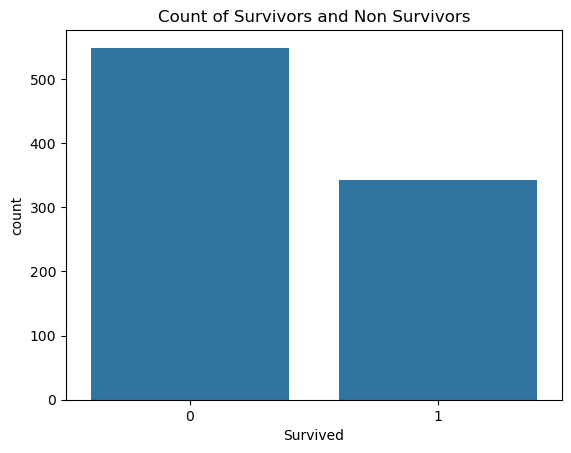

In [133]:
#Survivors and non survivors graph


sb.countplot(x = 'Survived', data = df)
plt.title('Count of Survivors and Non Survivors')
plt.show()

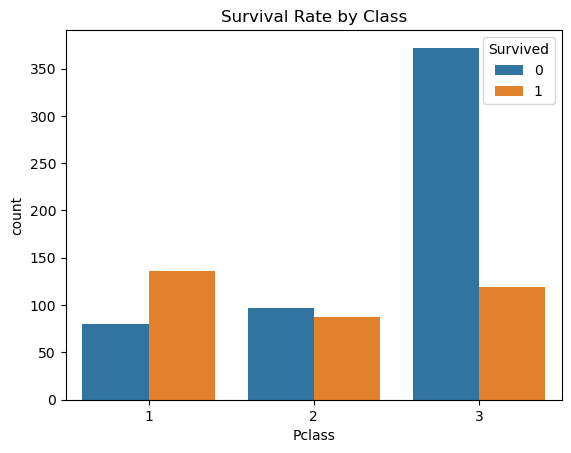

In [134]:
#Survival Rate by Class
sb.countplot(x = 'Pclass', hue = 'Survived', data = df) 
plt.title('Survival Rate by Class')
plt.show()

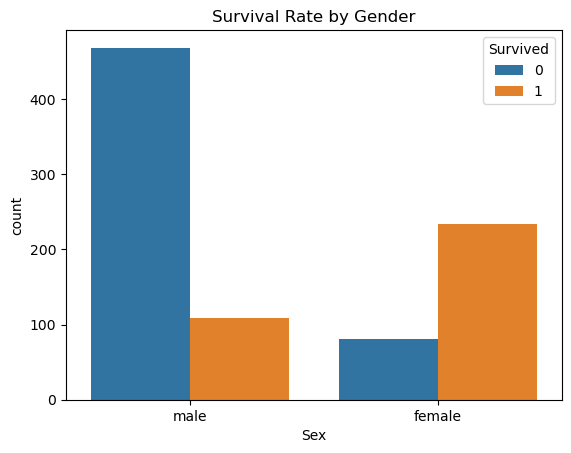

In [135]:
#Survival Rate by Gender
sb.countplot(x = 'Sex', hue = 'Survived', data = df)
plt.title('Survival Rate by Gender')
plt.show()

Text(0.5, 1.0, 'Age Distribution of Passengers')

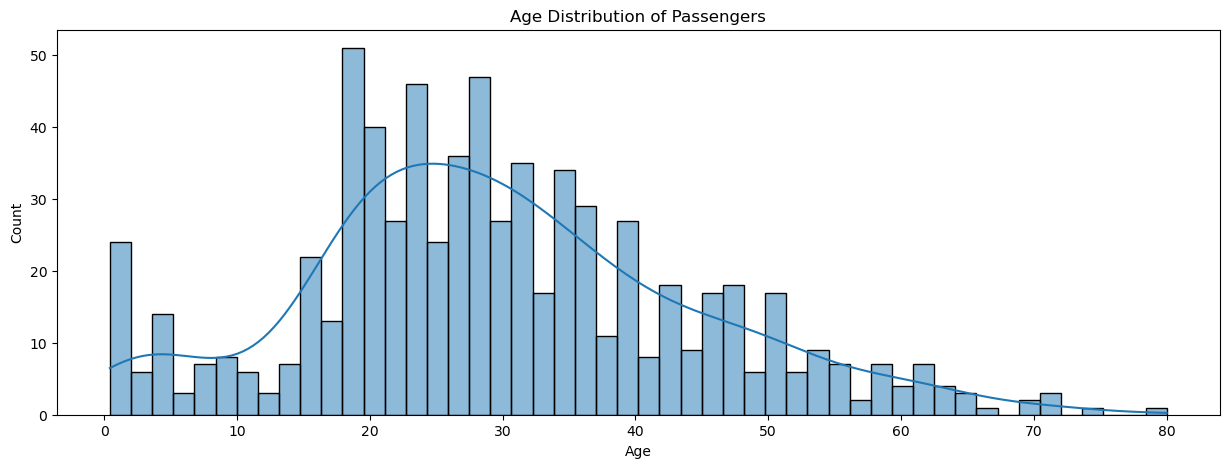

In [136]:
#Age distribution of Passengers
plt.figure(figsize = (15,5))
sb.histplot(df['Age'], bins = 50, kde = True) #kde: Kernel Density Estimation
plt.title('Age Distribution of Passengers')

## Data Cleaning

In [138]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [139]:
#Drop columns/features
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1, inplace = True)

In [140]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [141]:
#Mapping/Encoding the 'Gender' and 'Embarked' Features
#Mapping converts categorical values into numerical
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df['Embarked'] = df['Embarked'].map({'C':0, 'Q':1, 'S':2}) 


In [142]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2.0
1,1,1,1,38.0,1,0,71.2833,0.0
2,1,3,1,26.0,0,0,7.9250,2.0
3,1,1,1,35.0,1,0,53.1000,2.0
4,0,3,0,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,2.0
887,1,1,1,19.0,0,0,30.0000,2.0
888,0,3,1,NaN,1,2,23.4500,2.0
889,1,1,0,26.0,0,0,30.0000,0.0


In [143]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [144]:
#Dealing with missing values in 'Age' and 'Embarked'
df.fillna({'Age':df['Age'].mean(), 'Embarked': 1}, inplace = True) 

In [145]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [146]:
#EDA (Exploratory Data Analysis) = Data Visualization + Data Cleaning

## Model Training

In [149]:
#Feature Selection: Choosing the Input Features(X) and the Target variable (y)
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [150]:
#Splitting the data in Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [151]:
#Initializing the Algorithm for the model
dt_classifier = DecisionTreeClassifier()

In [152]:
#Training the Model on DTC 
dt_classifier.fit(X_train, y_train) #fit: train()

DecisionTreeClassifier()

In [153]:
#Testing the model
predictedValue = dt_classifier.predict(X_test) #predict: test

In [154]:
#Evaluating the performance of the model
accuracy_score(predictedValue, y_test)

0.7821229050279329

In [155]:
#Points to remember for accuracy score improvement
#Data (Synthetic data generation), EDA, Algorithm Selection 

In [156]:
acc = accuracy_score(predictedValue, y_test)
cm = confusion_matrix(predictedValue, y_test)
cr = classification_report(predictedValue, y_test)

#printing the performance report
print(f'Accuracy: {acc}')
print(f'\nConfusion Matrix:\n {cm}')
print(f'\nClassification Report:\n {cr}')

Accuracy: 0.7821229050279329

Confusion Matrix:
 [[86 20]
 [19 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       106
           1       0.73      0.74      0.73        73

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



In [188]:
import pickle
writebinary = open('titanicpickle1.pkl', 'wb')
pickle.dump(dt_classifier, writebinary)
writebinary.close()